In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
path = 'CART.xlsx'
data = pd.read_excel(path,engine = 'openpyxl')
data.head()

,RID,age,income,student,credit_rating,buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes


In [7]:
lab_encod = LabelEncoder()
data['age_encod'] = lab_encod.fit_transform(data['age'])
data['income_encod'] = lab_encod.fit_transform(data['income'])
data['student_encod'] = lab_encod.fit_transform(data['student'])
data['credit_rating_encod'] = lab_encod.fit_transform(data['credit_rating'])
data['buys_comp_encod'] = lab_encod.fit_transform(data['buys_computer'])

In [8]:
data_new = data.drop(['age','income','student','credit_rating',
                      'buys_computer'],axis='columns')
data_new.head()

,RID,age_encod,income_encod,student_encod,credit_rating_encod,buys_comp_encod
0,1,2,0,0,1,0
1,2,2,0,0,0,0
2,3,0,0,0,1,1
3,4,1,2,0,1,1
4,5,1,1,1,1,1


In [11]:
feature_cols = ['age_encod','income_encod','student_encod',
                'credit_rating_encod']
x = data_new.drop(['buys_comp_encod','RID'],axis = 'columns')
y = data_new['buys_comp_encod']

In [12]:
x.head()

,age_encod,income_encod,student_encod,credit_rating_encod
0,2,0,0,1
1,2,0,0,0
2,0,0,0,1
3,1,2,0,1
4,1,1,1,1


In [13]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: buys_comp_encod, dtype: int32

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
result = dtc.fit(x,y)
result

DecisionTreeClassifier()

In [18]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

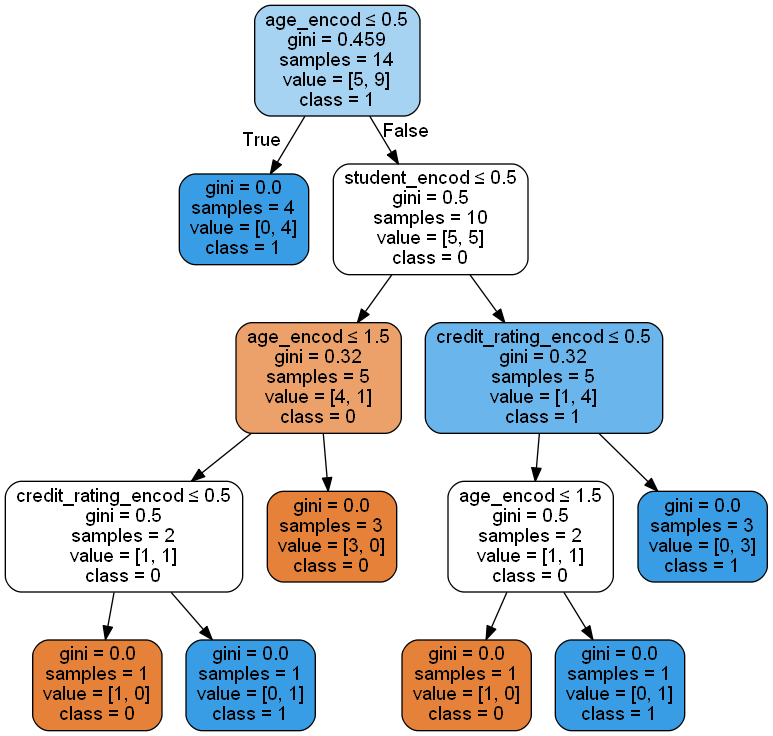

In [19]:
dot_data = StringIO()
export_graphviz(result,out_file = dot_data,
                filled=True, rounded= True,
                special_characters = True,feature_names = feature_cols,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('buys_computer.png')

Image(graph.create_png())

In [24]:
#Model Evaluation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
clf = DecisionTreeClassifier()
result = clf.fit(x_train,y_train)
print(result)

DecisionTreeClassifier()


In [25]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

Accuracy 0.75
